In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [6]:
def filter_df(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [2]:
r = readers.CollectionReader('../src/dmc/agents/')

100%|██████████| 92/92 [00:06<00:00, 14.37it/s]


In [3]:
games = ["dm2gym:WalkerWalk-v0", "dm2gym:CheetahRun-v0",
         "dm2gym:HumanoidRun-v0", "dm2gym:FingerSpin-v0",
         "dm2gym:ReacherEasy-v0", "dm2gym:CartpoleSwingup-v0"]
code_level_opts = {
      'clip_eps': [0.2, 1e8],
      'kl_penalty_coeff': [0.0, 3.0],
      "policy_net_type": ["CtsBetaPolicy", "CtsPolicy"],
}

In [4]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

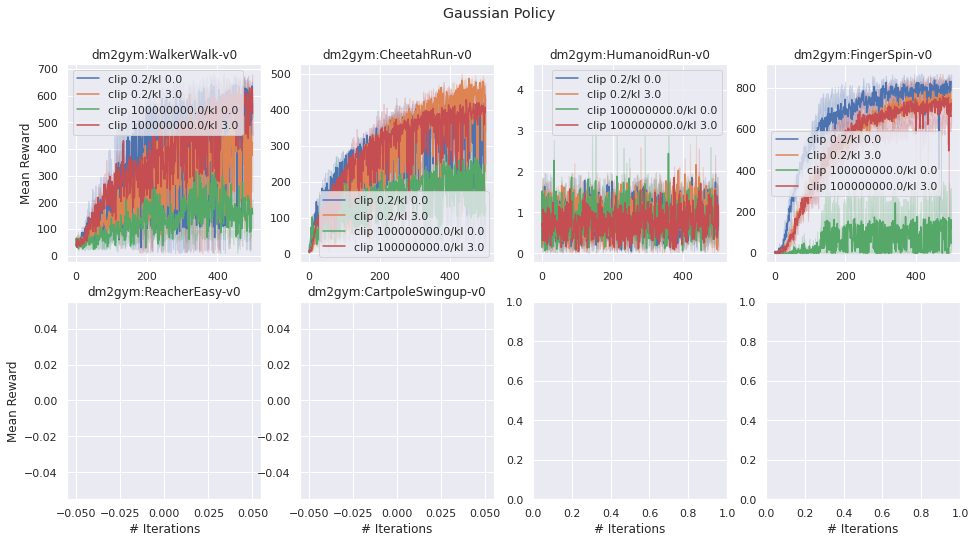

In [9]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for e in code_level_opts['clip_eps']:
        for k in code_level_opts['kl_penalty_coeff']:
            filt = filter_df(opt, clip_eps=e, game=g, policy_net_type='CtsPolicy', kl_penalty_coeff=k)
            sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                         ax=ax.flatten()[j], label=f"clip {e}/kl {k}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Gaussian Policy')
    
plt.show()

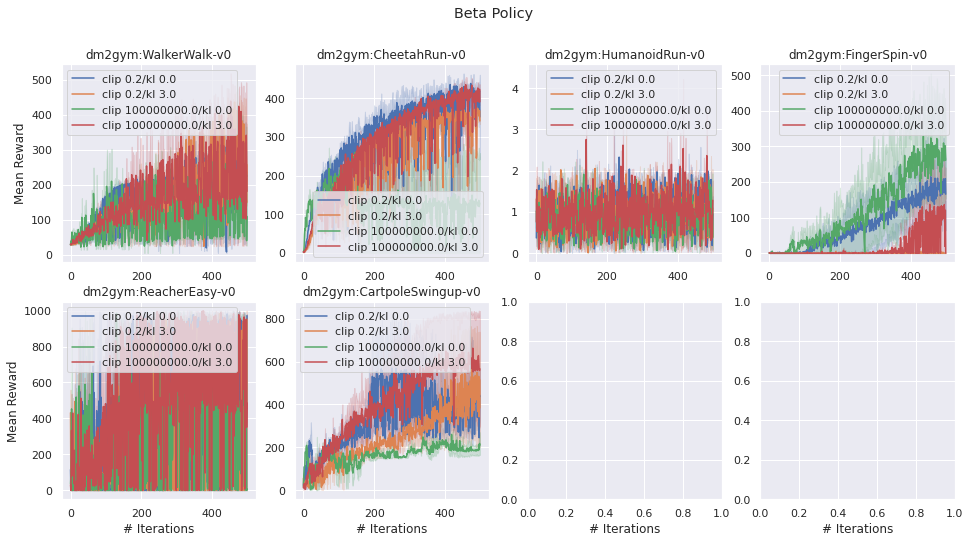

In [11]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for e in code_level_opts['clip_eps']:
        for k in code_level_opts['kl_penalty_coeff']:
            filt = filter_df(opt, clip_eps=e, game=g, policy_net_type='CtsBetaPolicy', kl_penalty_coeff=k)
            sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                         ax=ax.flatten()[j], label=f"clip {e}/kl {k}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Beta Policy')
    
plt.show()